# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
preg,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000
plas,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000
pres,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000
skin,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000
test,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000
mass,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000
pedi,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232
age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000
class,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [6]:
nonzero_pres_median = pima_df.median()
print(nonzero_pres_median)
#print(pima_df.head(10).T)
pima_df.loc[pima_df.pres ==0, "pres"] = nonzero_pres_median.pres
print(pima_df.head(10).T)
pima_df.loc[pima_df.plas ==0, "plas"] = nonzero_pres_median.plas
pima_df.loc[pima_df.skin ==0, "skin"] = nonzero_pres_median.skin
pima_df.loc[pima_df.test ==0, "test"] = nonzero_pres_median.test
pima_df.loc[pima_df.mass ==0, "mass"] = nonzero_pres_median.mass
pima_df.loc[pima_df.pedi ==0, "pedi"] = nonzero_pres_median.pedi



preg       3.0000
plas     117.0000
pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64
             0       1        2       3        4        5       6        7  \
preg     6.000   1.000    8.000   1.000    0.000    5.000   3.000   10.000   
plas   148.000  85.000  183.000  89.000  137.000  116.000  78.000  115.000   
pres    72.000  66.000   64.000  66.000   40.000   74.000  50.000   72.000   
skin    35.000  29.000    0.000  23.000   35.000    0.000  32.000    0.000   
test     0.000   0.000    0.000  94.000  168.000    0.000  88.000    0.000   
mass    33.600  26.600   23.300  28.100   43.100   25.600  31.000   35.300   
pedi     0.627   0.351    0.672   0.167    2.288    0.201   0.248    0.134   
age     50.000  31.000   32.000  21.000   33.000   30.000  26.000   29.000   
class    1.000   0.000    1.000   0.000    1.000    0.000   1.000    0.000   

             8        9  
preg     2.000  

# Q5 Print the descriptive statistics of each & every column using describe() function

In [7]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


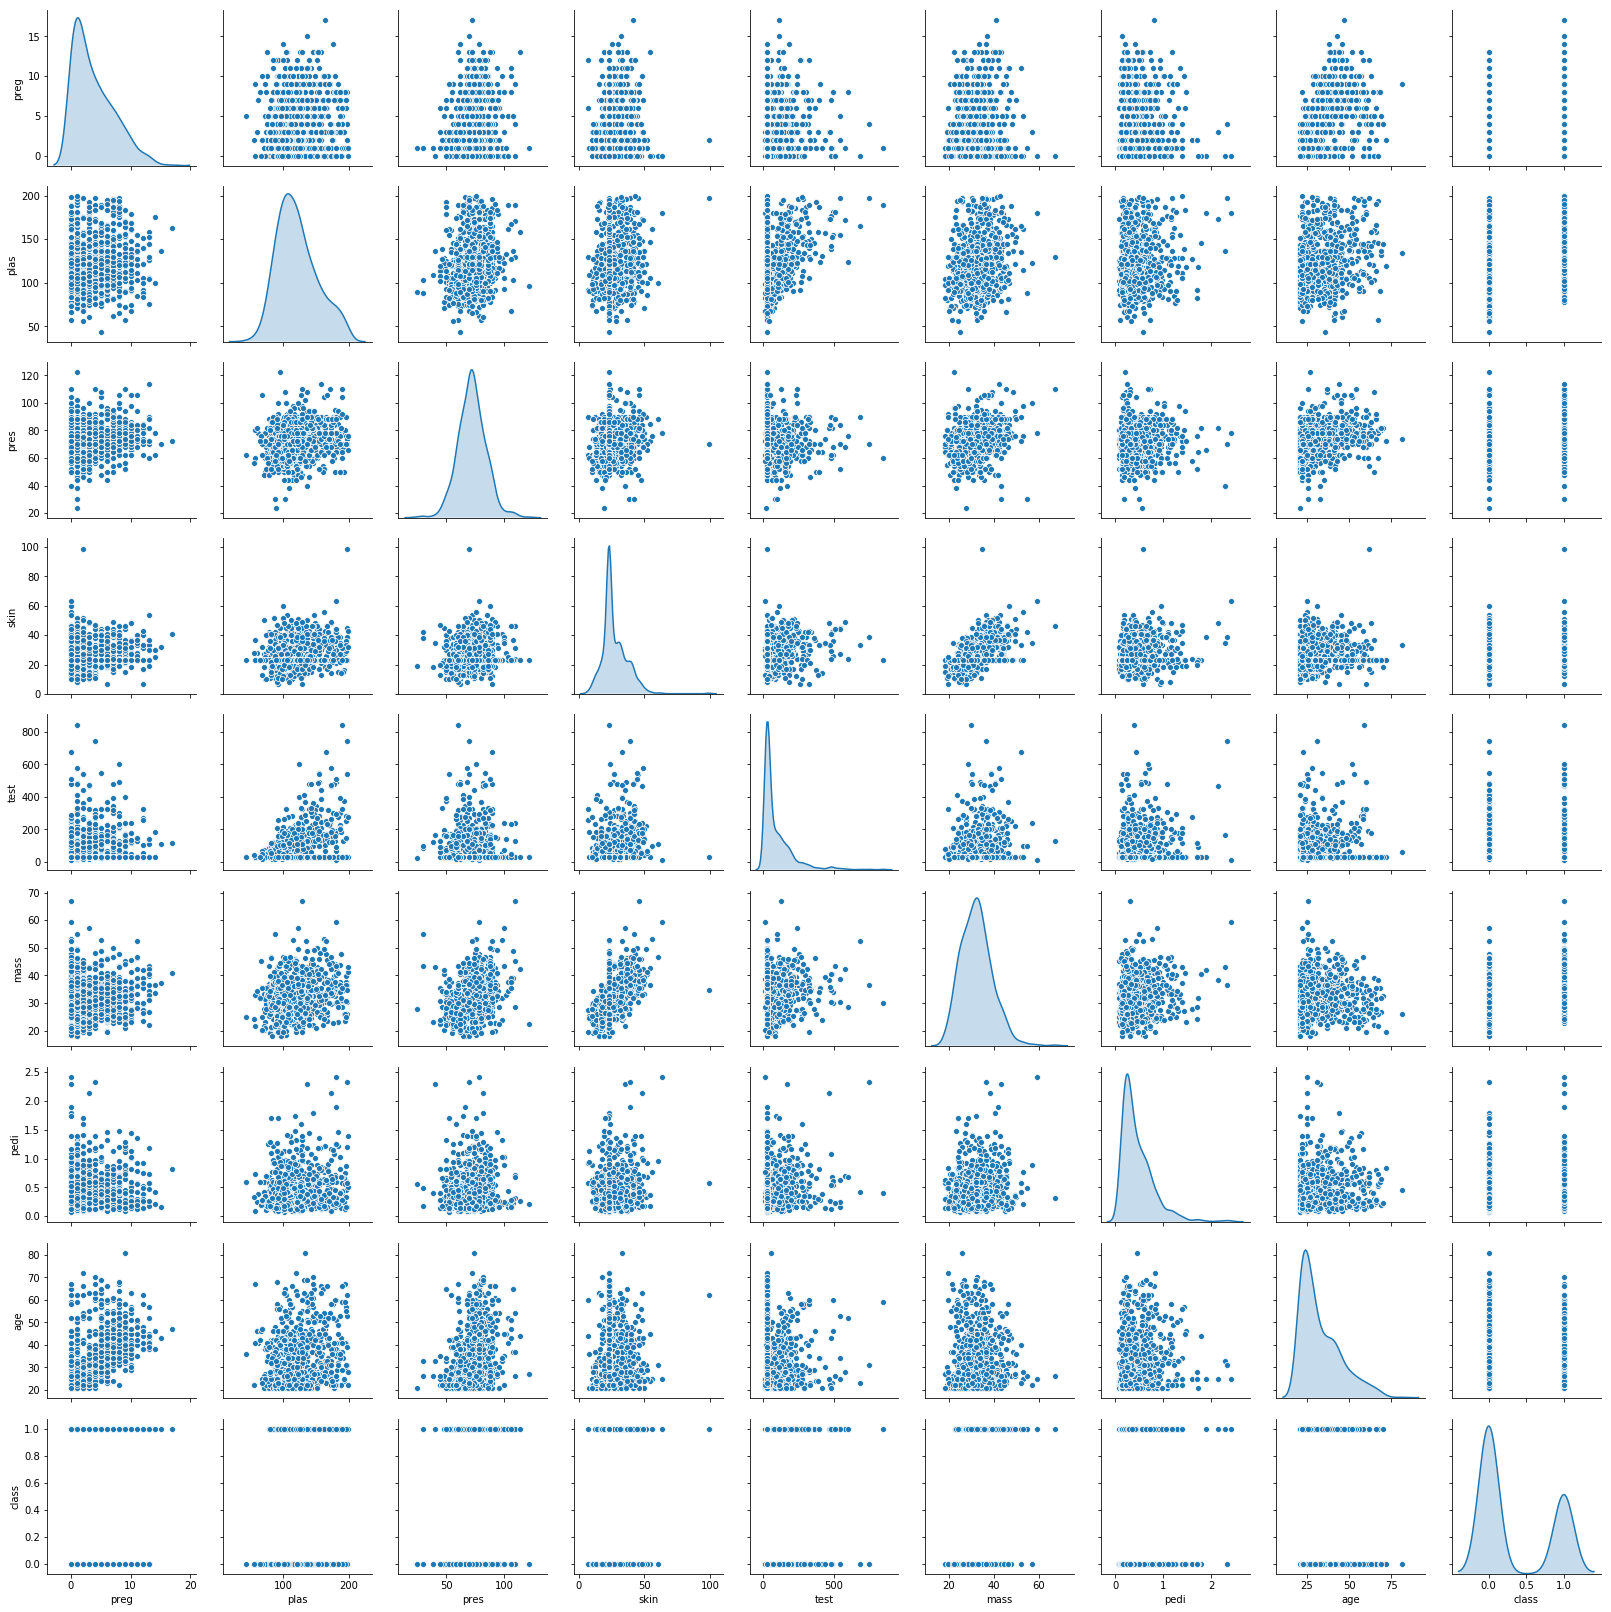

In [8]:
#sns.pairplot(pima_df, hue = "class")

sns.pairplot( pima_df , diag_kind='kde')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Answer - Diabetes is not dependent on any individual variable as such, it is dependent on probably a combination of variables from the above plot.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

ANSWER:- 
mas and plasma seem to have a good correlation
mass and skin seem to have a good correlation
mass and pedi seem to have a good correlation
pres and age seem to have a good correlation
pres and skin seem to have a good correlation
There are less people who have diabetes.
Additionally I have run VIF MODEL and on the basis of that,  Mass, pres and plasma, skin and age may be dropped from any model they are represented by other variables.

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [9]:
X = pima_df.drop("class", axis=1)
y = pima_df["class"]

In [10]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [11]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
y_predict = dt_model.predict(X_test)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [13]:

print(dt_model.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))


0.7229437229437229
[[115  32]
 [ 32  52]]


Print the feature importance of the decision model - Optional

Accuracy score is 73%
Recall is 62%
Precision is  62%
So it is a good model where the accuracy is high and also recall is high.

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7705627705627706
[[125  22]
 [ 31  53]]


Accuracy is 77%, recall is 63%

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [16]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=105)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, y_train)



In [17]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.7186147186147186
[[116  31]
 [ 34  50]]


In [ ]:
Accuracy is 72%, recall is 60%

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [18]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=100)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

In [19]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.7705627705627706
[[116  31]
 [ 22  62]]


In [ ]:
Accuracy is 77%, recall is 74%

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [21]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7878787878787878
[[122  25]
 [ 24  60]]


In [ ]:
Accuracy is 79%, recall is 71%

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.